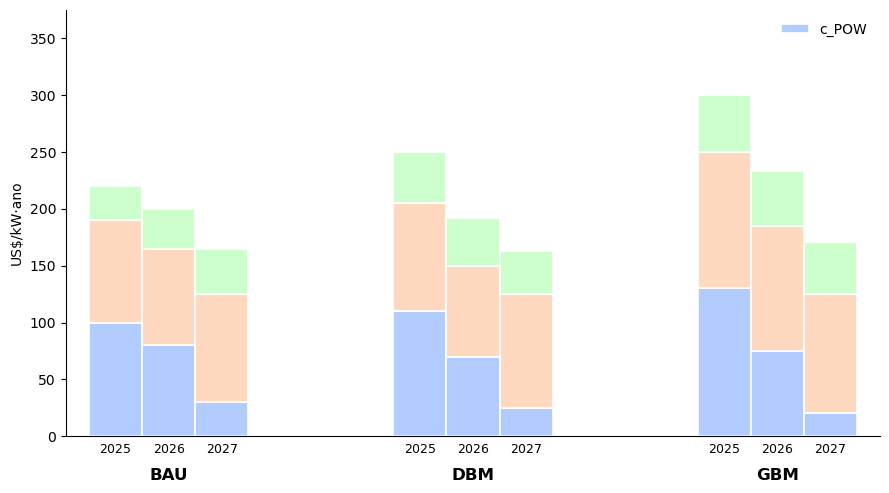

,Scenario,Year,c_POW,c_CAP,c_OM
0,BAU,2025,100,90,30
1,BAU,2026,80,85,35
2,BAU,2027,30,95,40
3,DBM,2025,110,95,45
4,DBM,2026,70,80,42
5,DBM,2027,25,100,38
6,GBM,2025,130,120,50
7,GBM,2026,75,110,48
8,GBM,2027,20,105,46


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
grouped_stacked_bars.py
Gera gráfico de barras empilhadas agrupadas por cenário (BAU, DBM, GBM) e,
dentro de cada grupo, uma barra empilhada por ano (2025–2027).

Dependências: numpy, pandas, matplotlib
Execute: python3 grouped_stacked_bars.py
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (opcional) aparência mais limpa
plt.rcParams.update({"axes.spines.top": False, "axes.spines.right": False})

# -----------------------
# Dados de exemplo (US$/kW·ano) — troque pelos seus
data = {
    "Scenario": ["BAU"]*3 + ["DBM"]*3 + ["GBM"]*3,
    "Year": ["2025", "2026", "2027"]*3,
    "c_POW": [100, 80, 30, 110, 70, 25, 130, 75, 20],
    "c_CAP": [90, 85, 95, 95, 80, 100, 120, 110, 105],
    "c_OM":  [30, 35, 40, 45, 42, 38, 50, 48, 46],
}
df = pd.DataFrame(data)

# -----------------------
# Parâmetros do layout
scenarios = ["BAU", "DBM", "GBM"]
years = ["2025","2026","2027"]
n_years = len(years)
bar_width = 0.22     # largura de cada barra (ano) dentro do grupo
gap = 0.60           # espaço entre grupos de cenários

# Posições dos grupos no eixo X
group_pos = np.arange(len(scenarios)) * (n_years * bar_width + gap)

# Cores suaves e rótulos das fatias
colors = [(0.70, 0.80, 1.00), (1.00, 0.85, 0.75), (0.80, 1.00, 0.80)]
labels = ["c_POW", "c_CAP", "c_O&M"]

# -----------------------
# Plot
fig, ax = plt.subplots(figsize=(9, 5))

for i, scen in enumerate(scenarios):
    subset = df[df["Scenario"] == scen]
    for j, year in enumerate(years):
        vals = subset[subset["Year"] == year][["c_POW", "c_CAP", "c_OM"]].values[0]
        x = group_pos[i] + j * bar_width
        bottom = 0.0
        for k, val in enumerate(vals):
            ax.bar(
                x, val, width=bar_width, bottom=bottom,
                color=colors[k], edgecolor="white", linewidth=1.2,
                label=labels[k] if (i == 0 and j == 0 and k == 0) else None
            )
            bottom += val
        # rótulo do ano sob cada barra
        ax.text(x, -6, year, ha="center", va="top", fontsize=9)

# rótulo do cenário centralizado sob cada grupo
for i, scen in enumerate(scenarios):
    xpos = group_pos[i] + (n_years - 1) * bar_width / 2
    ax.text(xpos, -28, scen, ha="center", va="top",
            fontsize=12, fontweight="bold")

ax.set_ylabel("US$/kW·ano")
ax.set_xticks([])  # tiramos ticks do x (usamos textos personalizados)
ax.set_ylim(0, df[["c_POW", "c_CAP", "c_OM"]].sum(axis=1).max() * 1.25)
ax.margins(x=0.03)
ax.legend(title="", loc="upper right", frameon=False)

plt.tight_layout()
# Salvar figura (opcional)
# plt.savefig("grouped_stacked_bars.png", dpi=200, bbox_inches="tight")
plt.show()

display(df)